<b> Source :</b> https://spark.apache.org/docs/latest/streaming-programming-guide.html#linking

-- Spark Streaming is an extension of the core Spark API that enables <b> scalable, high-throughput, fault-tolerant </b> stream processing of live data streams.

-- Data can be ingested from many sources like<b> Kafka, Kinesis, or TCP sockets,</b> and can be processed using complex algorithms expressed with high-level functions <b> like map, reduce, join and window.</b>

-- Finally, processed data can be pushed out to filesystems, databases, and live dashboards. In fact, you can apply<b> Spark’s machine learning and graph processing algorithms</b> on data streams.

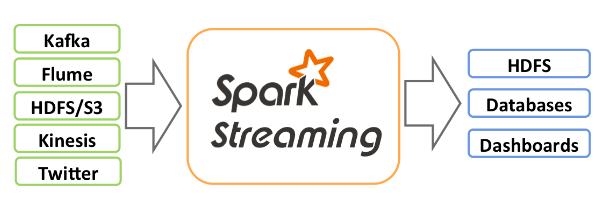

-- Internally, it works as follows. <b> Spark Streaming receives live input data streams </b>and <b>divides the data into batches, which are then processed by the Spark engine</b> to generate the final stream of results in batches.

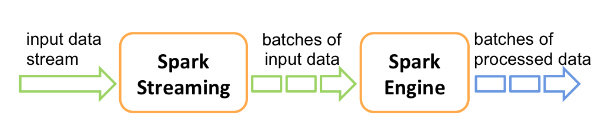

-- Spark Streaming provides a high-level abstraction called discretized stream or DStream, which represents a <b> continuous stream of data.</b>

-- DStreams can be created either from input data streams from sources such as <b> Kafka, and Kinesis, or by applying high-level operations on other DStreams.</b>

--  Internally, a <b> DStream is represented as a sequence of RDDs.</b>





## Install Java, Spark :

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
os.environ["SPARK_HOME"] # to check

'/content/spark-3.0.0-bin-hadoop3.2'

In [ ]:
import findspark #  locate spark 
findspark.init() # to make pyspark importable as a regular library
from pyspark.sql import SparkSession # The entry point to programming Spark with the Dataset and DataFrame API
spark = SparkSession.builder.master("local[*]").getOrCreate()

#Gets an existing SparkSession or, if there is no existing one, creates a new one based on the options set in this builder.

-  <b> To initialize a Spark Streaming program, a StreamingContext object has to be created which is the main entry point of all Spark Streaming functionality. </b>

- The <b>SparkContext</b> is the main point of entry. The <b>StreamingContext</b> reuses the logic that is part of SparkContext(task scheduling and resource management).

- A <b>SparkContext</b> represents the connection to a Spark cluster, and can be used to create RDDs, accumulators and broadcast variables on that cluster.

In [ ]:
import time
from pyspark import SparkContext
from pyspark.streaming import StreamingContext # A StreamingContext object can be created from a SparkContext object.

In [ ]:
from pyspark import SparkContext 
from pyspark.streaming import StreamingContext


#### After a context is defined, you have to do the following:

- Define the input sources by creating input DStreams.
- Define the streaming computations by applying transformation and output operations to DStreams.
- Start receiving data and processing it using <b> streamingContext.start().</b>
- Wait for the processing to be stopped (manually or due to any error) using <b>streamingContext.awaitTermination().</b>
- The processing can be manually stopped using <b> streamingContext.stop()</b>

#### Points to remember 

- <b>Once a context has been started, no new streaming computations can be set up or added to it.</b>
- Once a context has been stopped, it cannot be restarted.
- Only one StreamingContext can be active in a JVM at the same time.

Source: https://spark.apache.org/docs/latest/streaming-programming-guide.html


# RDD & DStream :

-- Data Sharing is <b> Slow in MapReduce (Hadoop) </b>

-- Recognizing this problem, researchers developed a specialized framework called Apache Spark. The key idea of spark is <b> Resilient Distributed Datasets (RDD).</b>

-- Resilient Distributed Datasets (RDD) is a <b>fundamental data structure of Spark.</b>

-- It is an <b> immutable distributed collection of objects.</b>

-- Each dataset in RDD is divided into logical partitions, which may be computed on different nodes of the cluster.

-- RDDs can contain any type of Python, Java, or Scala objects, including user-defined classes.

-- There are two ways to create RDDs − <b> parallelizing </b> an existing collection in your driver program, or <b> referencing a dataset</b> in an external storage system, such as a shared file system, HDFS, HBase, or any data source offering a Hadoop Input Format.

-- <b> DStream  is represented by a continuous series of RDDs</b>  which is Spark’s abstraction of an immutable.

-- Any operation applied on a DStream translates to operations on the underlying RDDs.

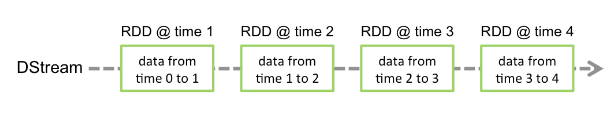



In [ ]:
# import sparkcontext
from pyspark import SparkContext
sc1 = SparkContext() # creating sparkcontext object
sc1

<SparkContext master=local[*] appName=pyspark-shell>

## RDD ---> DStream




### Creating an RDD
- using `parallelize`
- from a file

In [ ]:
a = range(10) # generates integers 0-9
print(a)
print(type)

range(0, 10)
<class 'type'>


### using parallelize

In [ ]:
numbers = sc1.parallelize(a)
print(numbers)

PythonRDD[1] at RDD at PythonRDD.scala:53


In [ ]:
numbers.collect() # returns a list containing all the elements in the rdd

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## uploading a file in colab

## creating an RDD from a file

- Types of RDD : https://mallikarjuna_g.gitbooks.io/spark/content/spark-rdd.html

e.g. HadoopRDD, MapPartitionsRDD, DoubleRDD etc.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving colours.txt to colours.txt


In [ ]:
colours = sc1.textFile('colours.txt', 2) #creating an RDD "colours" using stream context object "sc1" from a file "colours.txt", partition 2
print(colours)

colours.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0


- functions to apply on RDD : https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.fullOuterJoin.html

In [ ]:
colours.collect()

['orange',
 'blue',
 'green',
 'pink',
 'red',
 'white',
 'black',
 'white',
 'yellow',
 'green']

In [ ]:
colours.getNumPartitions()

2

In [ ]:
recolours = colours.repartition(4) # Return a new RDD that has exactly numPartitions partitions , this uses a shuffle to redistribute data
recolours.getNumPartitions() # does full shuffle

4

In [ ]:
rerecolours = recolours.coalesce(3) # Return a new RDD that is reduced into numPartitions partitions.
rerecolours.getNumPartitions()# It avoids a full shuffle

3

In [ ]:
glommed = rerecolours.glom() # create a new RDD by coalescing all elements within each partition into a list
glommed.collect()

[[],
 ['black', 'white', 'yellow', 'green'],
 ['orange', 'blue', 'green', 'pink', 'red', 'white']]

# Transformations on DStreams

- <b> Transformation is a function that produces new RDD from the existing RDDs. </b>

- <b> filter(func) :</b> Return a new DStream by selecting only the records of the source DStream on which func returns true.

Note : A <b>lambda function</b> evaluates an expression for a given argument. You give the function a value (argument) and then provide the operation (expression).

In [ ]:
odd = numbers.filter(lambda x: x%2 == 1)
odd.collect()

[1, 3, 5, 7, 9]

In [ ]:
oddlen = colours.filter(lambda x: len(x)%2 == 1)
oddlen.collect()

['green', 'red', 'white', 'black', 'white', 'green']

- <b> map(func)</b> : Return a new DStream by passing <b> each element</b> of the source DStream through a function func.

- The map operation takes a Function, which is called for each value in the input stream and produces one result value, which is sent to the output stream. ( one input / RDD - to - one output /RDD )

In [ ]:
increment = numbers.map(lambda x: x+1)
increment.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
wordlen = colours.map(lambda x: len(x))
wordlen.collect()

[6, 4, 5, 4, 3, 5, 5, 5, 6, 5]

- <b> distinct() :</b> return only unique elements present in the RDD

In [ ]:
uniqcolours = colours.distinct()
uniqcolours.collect()

['orange', 'green', 'yellow', 'blue', 'pink', 'red', 'white', 'black']

In [ ]:
samplecolours = colours.sample(True, 0.3) # to get sample data, sample with replacement(True) , fraction (0.0 - 1.0)
samplecolours.collect()

['red', 'white']

In [ ]:
phrases = sc1.parallelize(['today is a monday ','the sky is blue']) #creating RDD
phrases.collect()

['today is a monday ', 'the sky is blue']

In [ ]:
words = phrases.map(lambda x: x.split(' ')) # split() method splits a string into a list,
words.collect()# You can specify the separator, default separator is any whitespace

[['today', 'is', 'a', 'monday', ''], ['the', 'sky', 'is', 'blue']]

In [ ]:
wordlen = words.map(lambda x: len(x))
wordlen.collect()

[5, 4]

- <b> flatMap(func): </b>	Similar to map, but each input item can be mapped to 0 or more output items.

- The flatMap operation takes a function that conceptually wants to consume one value and produce an arbitrary number of values.
( one input - to -many output)

In [ ]:
words = phrases.flatMap(lambda x: x.split(' '))
words.collect()

['today', 'is', 'a', 'monday', '', 'the', 'sky', 'is', 'blue']

In [ ]:
wordlen = words.map(lambda x: len(x))
wordlen.collect()

[5, 2, 1, 6, 0, 3, 3, 2, 4]

- <b> union(otherStream): </b>	Return a new DStream that contains the union of the elements in the source DStream and otherDStream.

In [ ]:
rddA = sc1.parallelize([1,2,3])
rddB = sc1.parallelize([3,4,5])

rddunion = rddA.union(rddB)
rddunion.collect()

[1, 2, 3, 3, 4, 5]

- <b>intersection(otherStream) </b>

In [ ]:
rddintersect = rddA.intersection(rddB)
rddintersect.collect()

[3]

- <b> subtract(otherStream) </b>

In [ ]:
rddsubtract = rddA.subtract(rddB)
rddsubtract.collect()

[1, 2]

- <b> count() </b>:	Return a new DStream of single-element RDDs by counting the number of elements in each RDD of the source DStream.

In [ ]:
numbers.count()

10

In [ ]:
colours.count()

10

In [ ]:
numbers.top(4)

[9, 8, 7, 6]

In [ ]:
numbers.collect()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
colours.top(4)

['yellow', 'white', 'white', 'red']

In [ ]:
colours.collect()

['orange',
 'blue',
 'green',
 'pink',
 'red',
 'white',
 'black',
 'white',
 'yellow',
 'green']

- <b> countByValue():</b>	When called on a DStream of elements of type K, return a new DStream of (K, Long) pairs where the value of each key is its frequency in each RDD of the source DStream.

In [ ]:
colours.countByValue()

defaultdict(int,
            {'black': 1,
             'blue': 1,
             'green': 2,
             'orange': 1,
             'pink': 1,
             'red': 1,
             'white': 2,
             'yellow': 1})

In [ ]:
numbers.countByValue()

defaultdict(int, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

- <b> reduce(func): </b>	Return a new DStream of single-element RDDs by aggregating the elements in each RDD of the source DStream using a function func (which takes two arguments and returns one). The function should be associative and commutative so that it can be computed in parallel.

In [ ]:
from operator import add, mul
numbers.reduce(add)

45

In [ ]:
numbers.reduce(mul)

0

### Paired RDDs / (k,v) pairs

In [ ]:
prdd = sc1.parallelize([(1,2),(3,4),(3,2)])
prdd.collect()

[(1, 2), (3, 4), (3, 2)]

In [ ]:
pkeys = prdd.keys()
pkeys.collect()

[1, 3, 3]

In [ ]:
pvals = prdd.values()
pvals.collect()

[2, 4, 2]

In [ ]:
sorted = prdd.sortByKey()
sorted.collect()

[(1, 2), (3, 4), (3, 2)]

In [ ]:
revsorted = prdd.sortByKey(ascending = False)
revsorted.collect()

[(3, 4), (3, 2), (1, 2)]

In [ ]:
vmap = prdd.mapValues(lambda x: x+1)
vmap.collect()

[(1, 3), (3, 5), (3, 3)]

In [ ]:
gbykey = prdd.groupByKey().mapValues(list) #.mapValues(len)
gbykey.collect()

[(1, [2]), (3, [4, 2])]

In [ ]:
rbykey = prdd.reduceByKey(add)
rbykey.collect()

[(1, 2), (3, 6)]

In [ ]:
prdd.countByKey()

defaultdict(int, {1: 1, 3: 2})

In [ ]:
prdd.lookup(3)

[4, 2]



### Word Count Problem

**Problem:** Given a text file, find out the number of times each word appears in the file.

**Approach:**

- input

`The quick brown fox jumped over the lazy dog`

- output

```
(the, 2)
(quick, 1)
...
```

- assumptions:
  - case is not important
  - punctuation must be removed

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving meditations.txt to meditations.txt


In [ ]:
rawtext = sc1.textFile('meditations.txt') # creating RDD
print(rawtext)

meditations.txt MapPartitionsRDD[84] at textFile at NativeMethodAccessorImpl.java:0


In [ ]:
rawtext.take(10)

['The Project Gutenberg EBook of Meditations, by Marcus Aurelius',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: Meditations',
 '']

In [ ]:
rawtext.count()

7211

### Applying different transformations on that RDD :

- Every transformation (e.g. filter(), flatmap(), etc.) will create a new RDD


In [ ]:
# remove blank lines

text = rawtext.filter(lambda x: x!='')
text.take(10)

['The Project Gutenberg EBook of Meditations, by Marcus Aurelius',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 'Title: Meditations',
 'Author: Marcus Aurelius',
 'Posting Date: December 25, 2008 [EBook #2680]',
 'Release Date: June, 2001',
 'Language: English']

In [ ]:
# split into words

split = text.flatMap(lambda x: x.split())
split.take(30)

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Meditations,',
 'by',
 'Marcus',
 'Aurelius',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever.',
 'You',
 'may',
 'copy']

In [ ]:
# remove punctuation

import re # regular expression

nopunct = split.map(lambda x: re.sub('[^0-9a-zA-Z ]','', x))
# In re.sub(), specify a regular expression pattern in the first argument, a new string in the second, and a string to be processed in the third.
nopunct.take(30)

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'Meditations',
 'by',
 'Marcus',
 'Aurelius',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'You',
 'may',
 'copy']

In [ ]:
# lowercasing

lower = nopunct.map(lambda x: x.lower())
lower.take(10)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'meditations',
 'by',
 'marcus',
 'aurelius',
 'this']

In [ ]:
# generate word frequency

freq = lower.map(lambda x: (x,1))
freq.take(10)

[('the', 1),
 ('project', 1),
 ('gutenberg', 1),
 ('ebook', 1),
 ('of', 1),
 ('meditations', 1),
 ('by', 1),
 ('marcus', 1),
 ('aurelius', 1),
 ('this', 1)]

In [ ]:
# reduce by key

wordcounts = freq.reduceByKey(lambda x,y: x+y)
wordcounts.take(10)

#Take is used to get RDD from 0 to num-1 subscript elements, not sort.

[('project', 91),
 ('gutenberg', 30),
 ('ebook', 11),
 ('of', 2527),
 ('marcus', 63),
 ('aurelius', 31),
 ('this', 461),
 ('is', 1461),
 ('use', 93),
 ('anyone', 5)]

In [ ]:
# The top function is used to return the preceding num elements from RDD, by default (descending) or by the specified collation.
# most frequent 5 words
wordcounts.top(5)

[('zip', 1), ('zhn', 2), ('zeno', 5), ('zeal', 2), ('youths', 3)]

##  to return the largest key of every RDD in a DStream ( spark context object --> streaming context object)

In [ ]:
sc = SparkContext.getOrCreate()
ssc = StreamingContext(sc, 1) # Create a StreamingContext object using an existing SparkContext sc , read streaming data every second

In [ ]:
# Defining the stream
stream = ssc.queueStream([sc.parallelize([(1,"a"), (2,"b"),(1,"c"),(2,"d"),(1,"e"),(3,"f")])])

In [ ]:
maxstream = stream.reduce(max) #  aggregate action function is used to calculate min, max, and total of elements in a rdd/dstream
maxstream.pprint()

ssc.start()
time.sleep(6)
ssc.stop(stopSparkContext=True, stopGraceFully=True)

-------------------------------------------
Time: 2022-02-15 12:42:35
-------------------------------------------
(3, 'f')

-------------------------------------------
Time: 2022-02-15 12:42:36
-------------------------------------------

-------------------------------------------
Time: 2022-02-15 12:42:37
-------------------------------------------

-------------------------------------------
Time: 2022-02-15 12:42:38
-------------------------------------------

-------------------------------------------
Time: 2022-02-15 12:42:39
-------------------------------------------

-------------------------------------------
Time: 2022-02-15 12:42:40
-------------------------------------------

-------------------------------------------
Time: 2022-02-15 12:42:41
-------------------------------------------

-------------------------------------------
Time: 2022-02-15 12:42:42
-------------------------------------------



# Window -'ed'  Stream - Stream Join :



### Stream-stream join

Streams can be very easily joined with other streams.
```python
stream1 = ...
stream2 = ...
joinedStream = stream1.join(stream2)
```
Here, in each batch interval, the RDD generated by `stream1` will be joined with the RDD generated by `stream2`.Furthermore, it is often very useful to do <b> joins over windows of the streams. </b>That is pretty easy as well.
```python
windowedStream1 = stream1.window(20)
windowedStream2 = stream2.window(60)
joinedStream = windowedStream1.join(windowedStream2)

```
More Examples : https://medium.com/analytics-vidhya/apache-spark-discretized-streams-dstreams-with-pyspark-4882026b4fa4

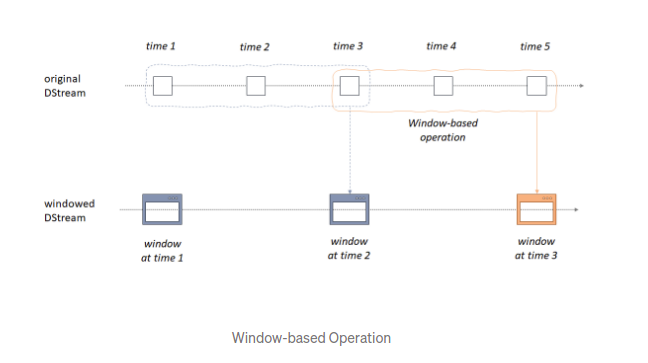

In [ ]:
sc2 = SparkContext.getOrCreate() # create sparkcontext object
ssc2 = StreamingContext(sc2, 1) # we want to read streaming data in every second (1)

In [ ]:
from pprint import pprint
rdd_queue = [] # Create Input Data
for i in range(5): 
    rdd_data = range(1000) 
    rdd = ssc2.sparkContext.parallelize(rdd_data) # creating 5 RDDs containing 0-999
    rdd_queue.append(rdd) # add data to one rdd 
pprint(rdd_queue) # Final RDD
# using streamingContext.queueStream(queueOfRDDs). Each RDD pushed into the queue will be treated as a batch of data in the DStream, and processed like a stream.
# Creating queue stream # 1 , # map() returns a new disb. dataset (K,V)
ds1 = ssc2.queueStream(rdd_queue).map(lambda x: (x % 10, 1)).window(4).reduceByKey(lambda v1,v2:v1+v2) # output: (K,V)
ds1.pprint()

[PythonRDD[111] at RDD at PythonRDD.scala:53,
 PythonRDD[112] at RDD at PythonRDD.scala:53,
 PythonRDD[113] at RDD at PythonRDD.scala:53,
 PythonRDD[114] at RDD at PythonRDD.scala:53,
 PythonRDD[115] at RDD at PythonRDD.scala:53]


In [ ]:
# Creating queue stream # 2
ds2 = ssc2.queueStream(rdd_queue).map(lambda x: (x % 5, 1)).window(windowDuration=20).reduceByKey(lambda v1,v2:v1+v2) # Output : (K,W)
ds2.pprint()

In [ ]:
# Crossing the Streams
joinedStream = ds1.join(ds2) # When called on two DStreams of (K, V) and (K, W) pairs, return a new DStream of (K, (V, W)) pairs with all pairs of elements for each key
joinedStream.pprint()

In [ ]:
ssc2.start()
time.sleep(6)
ssc2.stop(stopSparkContext=True, stopGraceFully=True)

-------------------------------------------
Time: 2022-02-15 14:01:02
-------------------------------------------
(0, 100)
(2, 100)
(4, 100)
(6, 100)
(8, 100)
(1, 100)
(3, 100)
(5, 100)
(7, 100)
(9, 100)

-------------------------------------------
Time: 2022-02-15 14:01:02
-------------------------------------------
(0, 200)
(2, 200)
(4, 200)
(1, 200)
(3, 200)

-------------------------------------------
Time: 2022-02-15 14:01:02
-------------------------------------------
(0, (100, 200))
(2, (100, 200))
(4, (100, 200))
(1, (100, 200))
(3, (100, 200))

-------------------------------------------
Time: 2022-02-15 14:01:03
-------------------------------------------
(0, 200)
(2, 200)
(4, 200)
(6, 200)
(8, 200)
(1, 200)
(3, 200)
(5, 200)
(7, 200)
(9, 200)

-------------------------------------------
Time: 2022-02-15 14:01:03
-------------------------------------------
(0, 400)
(2, 400)
(4, 400)
(1, 400)
(3, 400)

-------------------------------------------
Time: 2022-02-15 14:01:03
-----